# Newscatcher data import

In [23]:
from newscatcherapi import NewsCatcherApiClient
newscatcherapi = NewsCatcherApiClient(x_api_key='zognONu15PYalLiTnFl8oSjY-5iAA60-C_Mskz19DMo')

query = "Unfall AND Verkehr"

all_articles = newscatcherapi.get_search_all_pages(q=query,
                                         #lang='en',
                                         countries='CH',
                                         from_="2022/02/24",
                                         to_="2024/11/20",
                                         page_size=100,
                                         max_page=10,
                                         seconds_pause=1.0
                                         )

1 page is going to be extracted
Total number of found articles => 7180.
Total number of pages 72.
2/10 page is going to be extracted
3/10 page is going to be extracted
4/10 page is going to be extracted
5/10 page is going to be extracted
6/10 page is going to be extracted
7/10 page is going to be extracted
8/10 page is going to be extracted
9/10 page is going to be extracted
10/10 page is going to be extracted


In [24]:
def save_to_json(data, file):
    # Save JSON data to a file
    with open(file, "w") as json_file:
        json.dump(data, json_file, indent=4)
save_to_json(all_articles, "NC_CH_qUnfall_AND_Verkehr_2022-02-24_2024_11_20.json")

After inspecting the data I found out that there are articles that seemed not to work. 
I did write a python script which does the full search again (should be done by the platform already)
But I got the same results ... :(

In [ ]:
from newspaper import Article
from full_text_search import *
query =  "Unfall AND Verkehr"
for article in all_articles["articles"]:
    #a = Article(article["link"])
    #a.download()
    #a.parse()
    result = search_in_text(query, article["title"] + article["summary"])
    if not result:
        display(article["title"],article["summary"])

It turned out that, the weirdnes of those texts are due the fact that they are live ticker events. 
Its news feeds that get continuisly updated containing the same url. In the file new_data_summary.ipynb I analysed the distribution of text length and got this results, as one can see it flattens out at the tail, I checked, all those tail events are live-ticker people added by mistake. I filterout any article that has length above 6000+ characters
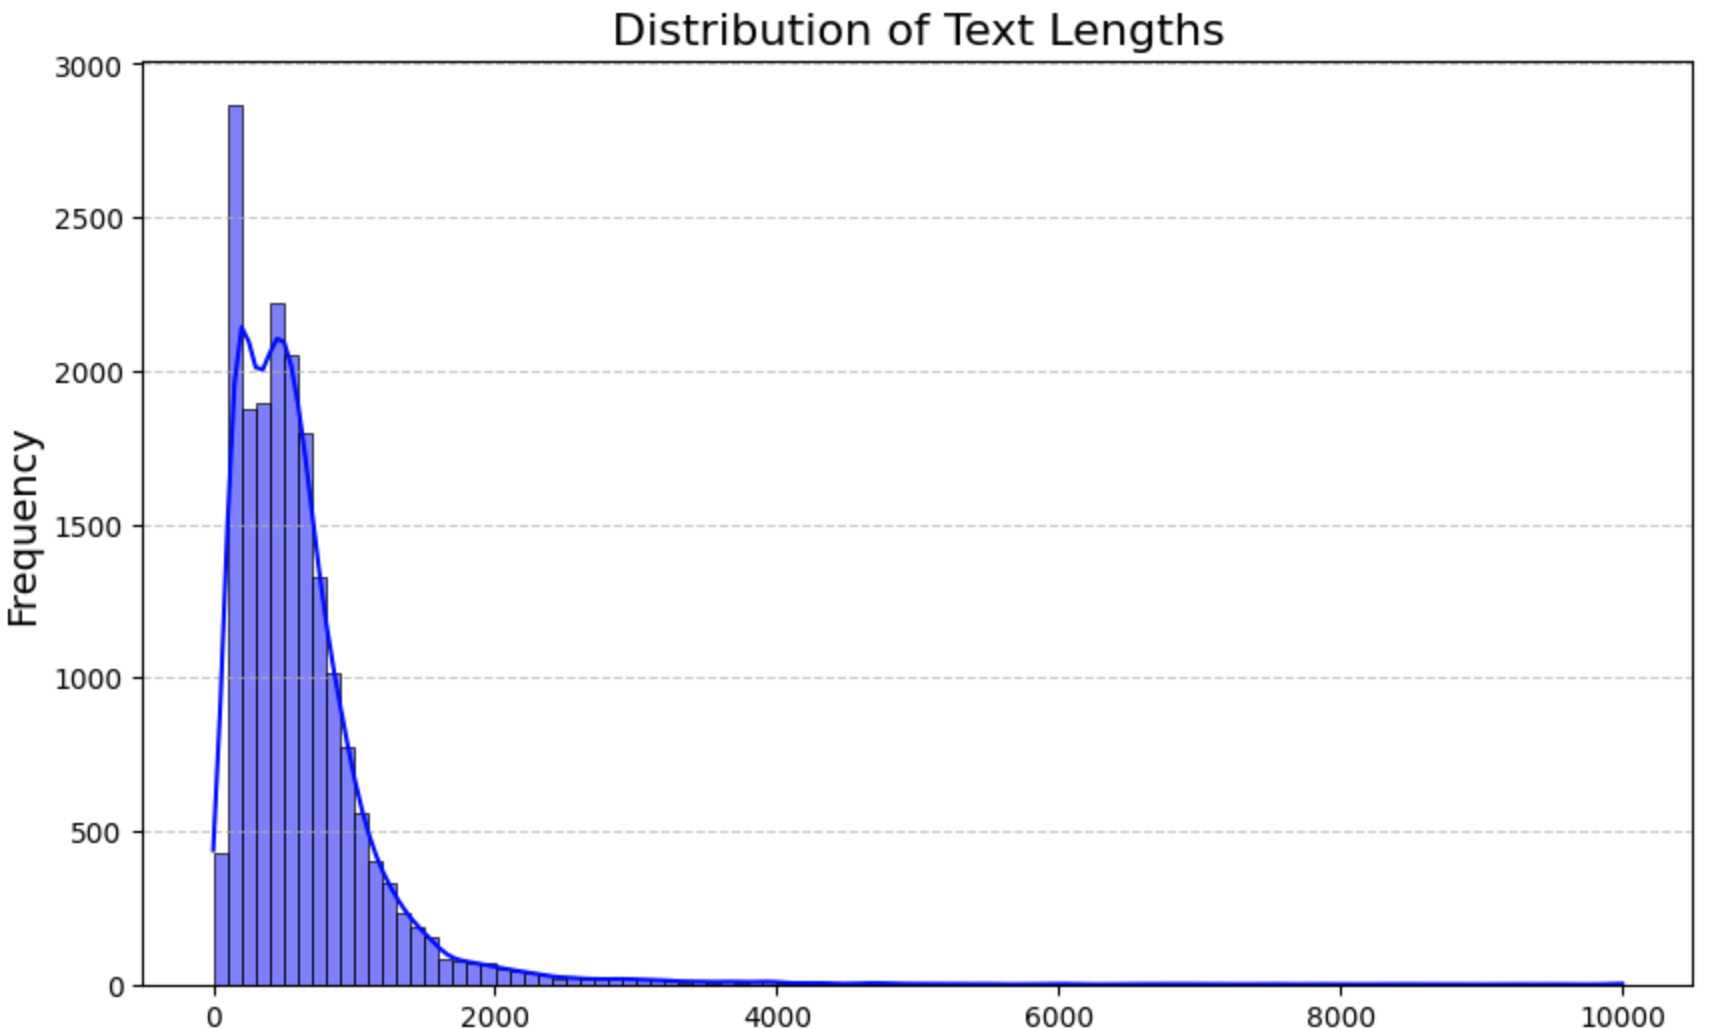

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


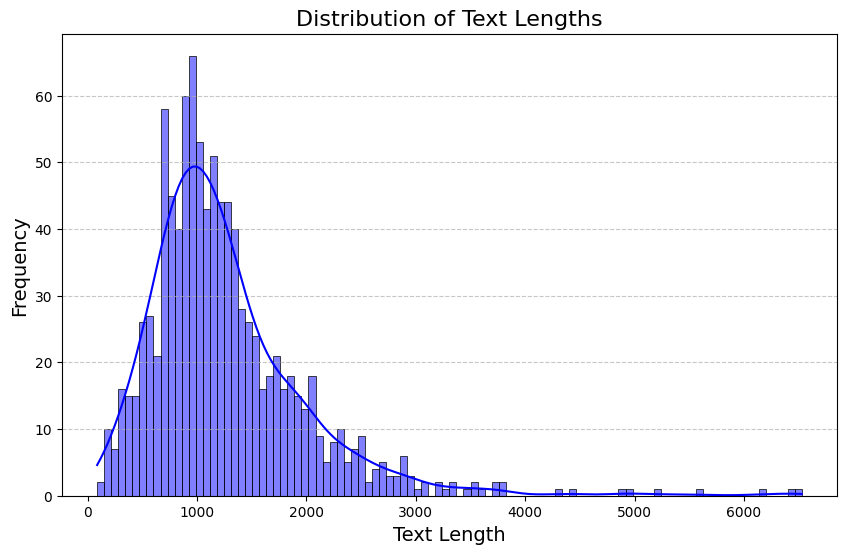

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame(all_articles["articles"])
df['text_length'] = df['summary'].str.len()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:



df = pd.DataFrame(all_articles["articles"])
df['text_length'] = df['summary'].str.len()
new_df = df[df["text_length"] > 6000]
len(new_df)
display(new_df["title"])


29    «Es ist pervers» – Auf der A1 bei Bern zeigt s...
31    Schaffhausen: Rucksack aus Zügeltransporter ge...
32    Beringen: Unbekannte beschädigt Gartenwerkzeug...
34    100 Franken Haltegebühr – so will Luzerns Stad...
36    100 Franken Haltegebühr – so will Luzerns Stad...
37    Luzerner Stadtrat plant Haltegebühr von 100 Fr...
38    Thurgauer des Tages: Eishockeyspieler Dominik ...
39    Frage des Tages: Bereit für den Wintereinbruch...
40    Fünf neue Firmen in der Region Weinfelden +++ ...
41    TKB erhält Bronze-Auszeichnung vom WWF +++ Eis...
42    Thurgauer GLP Präsidium zeigt neue wie auch al...
Name: title, dtype: object